# Predict if the server will be hacked

This is a classification problem as the target variable MULTIPLE_OFFENSE is either 1:Yes or 0:No. 

## Summary/Steps followed in the solution-
1) Data load and gathering statistics on data such as shape and data types

2) Identification of missing data, if any, and unacceptable data values such as NaN or INF

3) Identifying categorical and numerical features

4) Exploratory Data Analaysis to extract insights and best features

5) Feature Generation

6) Model selection

7) Evaluation classification report

8) Generating Submission

In [71]:
# importing packages

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,recall_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import GridSearchCV

### Step 1: Data load and gathering statistics on data such as shape and data types

In [2]:
traindata_raw=pd.read_csv('./Dataset 2/Train.csv')

In [3]:
testdata_raw=pd.read_csv('./Dataset 2/Test.csv')

In [4]:
traindata_raw.shape

(23856, 18)

In [5]:
testdata_raw.shape

(15903, 17)

In [6]:
traindata_raw.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [7]:
testdata_raw.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [9]:
traindata_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
INCIDENT_ID         23856 non-null object
DATE                23856 non-null object
X_1                 23856 non-null int64
X_2                 23856 non-null int64
X_3                 23856 non-null int64
X_4                 23856 non-null int64
X_5                 23856 non-null int64
X_6                 23856 non-null int64
X_7                 23856 non-null int64
X_8                 23856 non-null int64
X_9                 23856 non-null int64
X_10                23856 non-null int64
X_11                23856 non-null int64
X_12                23674 non-null float64
X_13                23856 non-null int64
X_14                23856 non-null int64
X_15                23856 non-null int64
MULTIPLE_OFFENSE    23856 non-null int64
dtypes: float64(1), int64(15), object(2)
memory usage: 3.3+ MB


In [10]:
testdata_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15903 entries, 0 to 15902
Data columns (total 17 columns):
INCIDENT_ID    15903 non-null object
DATE           15903 non-null object
X_1            15903 non-null int64
X_2            15903 non-null int64
X_3            15903 non-null int64
X_4            15903 non-null int64
X_5            15903 non-null int64
X_6            15903 non-null int64
X_7            15903 non-null int64
X_8            15903 non-null int64
X_9            15903 non-null int64
X_10           15903 non-null int64
X_11           15903 non-null int64
X_12           15776 non-null float64
X_13           15903 non-null int64
X_14           15903 non-null int64
X_15           15903 non-null int64
dtypes: float64(1), int64(14), object(2)
memory usage: 2.1+ MB


### Step 2: Identification of missing data, if any, and unacceptable data values such as NaN or INF

#### All data types seem to be correct in both train and test data, date column can be changed to data type depending on the usage later on.
#### There seem to be some values missing or NULL in column X12 in both train and test data

In [15]:
traindata_raw.replace([np.inf, -np.inf], np.nan,inplace=True)
testdata_raw.replace([np.inf, -np.inf], np.nan,inplace=True)

In [12]:
pd.isna(traindata_raw).any()

INCIDENT_ID         False
DATE                False
X_1                 False
X_2                 False
X_3                 False
X_4                 False
X_5                 False
X_6                 False
X_7                 False
X_8                 False
X_9                 False
X_10                False
X_11                False
X_12                 True
X_13                False
X_14                False
X_15                False
MULTIPLE_OFFENSE    False
dtype: bool

In [17]:
traindata_raw[pd.isna(traindata_raw.X_12)]

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
167,CR_189499,10-FEB-17,0,36,34,2,1,1,0,1,5,1,174,NaN,103,93,43,1
236,CR_186311,22-NOV-17,0,9,10,7,3,2,7,2,5,1,174,NaN,10,80,0,1
274,CR_189730,07-OCT-17,5,36,34,2,1,18,13,1,5,1,127,NaN,103,87,43,1
315,CR_189713,04-MAR-17,5,36,34,2,1,13,18,1,5,1,174,NaN,92,29,43,1
430,CR_196035,29-NOV-18,0,33,32,2,1,7,1,0,5,1,174,NaN,111,93,43,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23561,CR_193309,21-JUL-18,0,7,8,7,3,2,7,0,5,1,174,NaN,84,130,23,1
23680,CR_193429,03-DEC-18,0,9,10,7,3,5,6,1,5,1,174,NaN,92,93,46,1
23682,CR_196525,30-SEP-18,3,36,34,2,1,9,8,1,5,1,174,NaN,92,29,43,1
23714,CR_196233,23-JAN-18,0,36,34,2,1,1,0,1,5,1,174,NaN,103,93,43,1


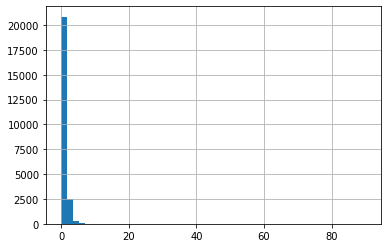

In [35]:
traindata_raw.X_12.hist(bins=50)

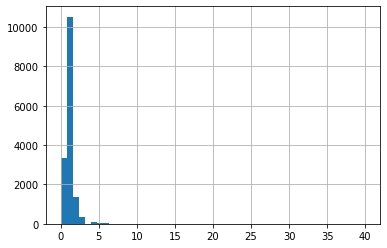

In [46]:
testdata_raw.X_12.hist(bins=50)

In [45]:
traindata_raw.groupby('X_12').INCIDENT_ID.count()

X_12
0.0      5171
1.0     15674
2.0      2039
3.0       476
4.0       176
5.0        59
6.0        36
7.0         4
8.0         9
9.0         6
10.0        7
11.0        4
12.0        1
14.0        1
15.0        2
16.0        1
17.0        1
20.0        2
30.0        1
40.0        1
50.0        1
58.0        1
90.0        1
Name: INCIDENT_ID, dtype: int64

In [47]:
testdata_raw.groupby('X_12').INCIDENT_ID.count()

X_12
0.0      3346
1.0     10530
2.0      1381
3.0       321
4.0       100
5.0        42
6.0        23
7.0        10
8.0         9
9.0         3
10.0        4
11.0        2
12.0        1
14.0        1
18.0        1
20.0        1
40.0        1
Name: INCIDENT_ID, dtype: int64

#### X_12 values are mostly 1. Replacing null values with 1 as the number rows missing X_12 values is very less(<2%), it should not make much of an impact

In [57]:
traindata_raw.X_12.replace(np.nan,1,inplace=True)
testdata_raw.X_12.replace(np.nan,1,inplace=True)

### Step 3: Identifying categorical and numerical features

#### Categorical features:
Data is the only categorical as all other columns have either float or int data type.

#### Numerical features:
X_1 to X_15


In [59]:
traindata_raw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X_1,23856.0,0.483778,1.439738,0.0,0.0,0.0,0.0,7.0
X_2,23856.0,24.791206,15.240231,0.0,7.0,24.0,36.0,52.0
X_3,23856.0,24.637450,15.135093,0.0,8.0,24.0,35.0,52.0
X_4,23856.0,4.276744,2.944672,0.0,2.0,4.0,6.0,10.0
X_5,23856.0,2.455609,1.963095,0.0,1.0,3.0,5.0,5.0
X_6,23856.0,6.154175,4.471756,1.0,3.0,5.0,8.0,19.0
X_7,23856.0,4.876509,3.881931,0.0,2.0,4.0,7.0,18.0
X_8,23856.0,0.972460,1.453144,0.0,0.0,1.0,1.0,99.0
X_9,23856.0,4.924128,1.362625,0.0,5.0,5.0,6.0,6.0
X_10,23856.0,1.244802,1.119301,1.0,1.0,1.0,1.0,90.0


### Step 4: Exploratory Data Analaysis to extract insights and best features

In [61]:
# check the distribution of data across the target classes

traindata_raw.groupby('MULTIPLE_OFFENSE').INCIDENT_ID.count()

MULTIPLE_OFFENSE
0     1068
1    22788
Name: INCIDENT_ID, dtype: int64

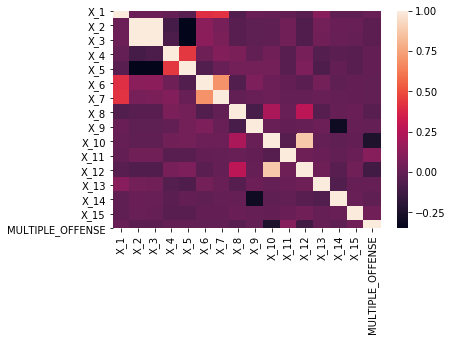

In [64]:
# Correlation matrix of data
corr=traindata_raw.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

#### There seem to be very less correlation between the target and X_10 and X_12. 
#### All other columns have good correlation with the target

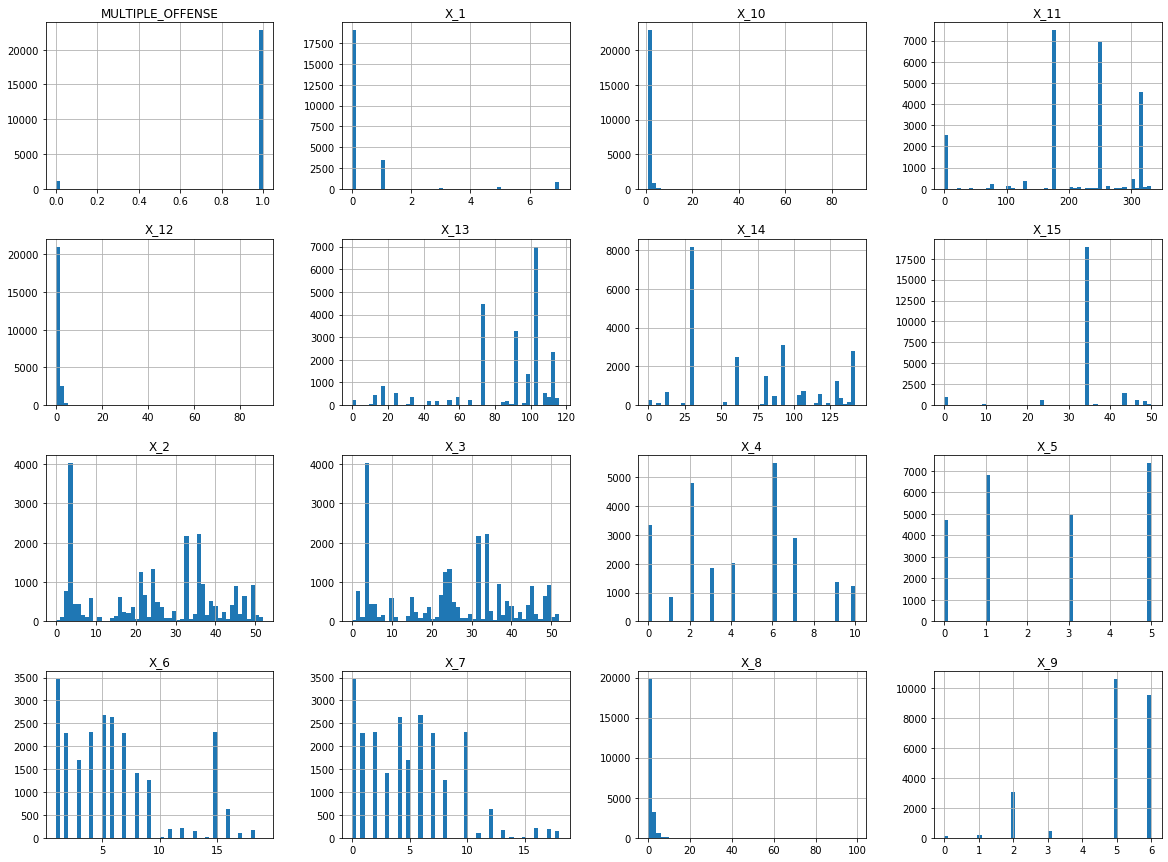

In [65]:
traindata_raw.hist(bins=50,figsize=(20,15))
plt.show()

#### X_1,X_10,X_12 and X_8 are positively skewed, boxcox normalisation can be tried on these columns as the values are non-negative

### Step 5: Feature Generation

In [73]:
# Concatinating train and test for feature generation

data_processing=pd.concat([traindata_raw,testdata_raw],axis=0,sort=False)

In [74]:
data_processing.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0.0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1.0
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1.0
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1.0
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1.0


In [75]:
# Extracting Day and Month features from date to include seasonality information in the model.

data_processing['day']=data_processing.DATE.apply(lambda x: x.split('-')[0])
data_processing['month']=data_processing.DATE.apply(lambda x: x.split('-')[1])

In [76]:
data_processing.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,day,month
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0.0,04,JUL
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1.0,18,JUL
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1.0,15,MAR
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1.0,13,FEB
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1.0,13,APR


In [77]:
y=data_processing.loc[~data_processing.MULTIPLE_OFFENSE.isna()].MULTIPLE_OFFENSE
data_processing=pd.get_dummies(data_processing,columns=['day','month'],drop_first=True).drop(columns=['INCIDENT_ID','DATE'])
X=data_processing.loc[~data_processing.MULTIPLE_OFFENSE.isna()].drop(columns=['MULTIPLE_OFFENSE'])
X_test=data_processing.loc[data_processing.MULTIPLE_OFFENSE.isna()].drop(columns=['MULTIPLE_OFFENSE'])

In [53]:
# X.replace(-np.inf,0,inplace=True)
# X.replace(np.inf,0,inplace=True)
# X.replace(np.NaN,0,inplace=True)

# X_test.replace(-np.inf,0,inplace=True)
# X_test.replace(np.inf,0,inplace=True)
# X_test.replace(np.NaN,0,inplace=True)

In [78]:
# Splitting 10% data from train for evaluation

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.15,random_state=42)

#### Train, Eval and Test data is ready for model training and prediction

### Step 6: Model selection

#### I will XGboost classifier

In [ ]:
params = {
    'learning_rate':[0.003,0.01,0.03],
    'max_depth':[6,8],
    'n_estimators':[300,400,500]
}

xgb = XGBClassifier(base_score=0.5, booster='gbtree',
                   max_delta_step=0,
                   min_child_weight=1, 
                   random_state=0, reg_alpha=0,
                   reg_lambda=1,eval_metric='auc',subsample=1
                  )

grid_obj = GridSearchCV(xgb, params,cv=2).fit(X_train,y_train)

In [ ]:
classifier=grid_obj.best_estimator_
classifier.fit(X_train,y_train)

### Step 7: Evaluation classification report

In [91]:
y_pred_val=classifier.predict(X_val)

In [92]:
print(confusion_matrix(y_val,y_pred_val))
print(classification_report(y_val,y_pred_val))
print(accuracy_score(y_val,y_pred_val))
print(recall_score(y_val,y_pred_val))

[[ 178    0]
 [   1 3400]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       178
         1.0       1.00      1.00      1.00      3401

    accuracy                           1.00      3579
   macro avg       1.00      1.00      1.00      3579
weighted avg       1.00      1.00      1.00      3579

0.9997205923442303
0.9997059688326962


### Step 8: Generating Submission

In [93]:
y_pred_test=classifier.predict(X_test)

In [94]:
testdata_raw['MULTIPLE_OFFENSE']=y_pred_test

In [95]:
testdata_raw.MULTIPLE_OFFENSE=testdata_raw.MULTIPLE_OFFENSE.astype('int')

In [96]:
testdata_raw.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,1.0,72,119,23,1
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34,1
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34,1
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34,1
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43,1


In [98]:
testdata_raw[['INCIDENT_ID','MULTIPLE_OFFENSE']].to_csv('submission.csv',index=False)

In [97]:
testdata_raw.groupby('MULTIPLE_OFFENSE')['INCIDENT_ID'].count()

MULTIPLE_OFFENSE
0      721
1    15182
Name: INCIDENT_ID, dtype: int64